In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Load training data
X_train = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv", header=None)
y_train = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv", header=None)

# Load testing data
X_test = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv", header=None)
y_test = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv", header=None)

# Print shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 1)


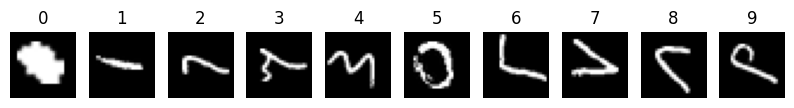

In [4]:
# Plotting first 10 digits from training set
plt.figure(figsize=(10, 2))
for i in range(10):
    image = X_train.iloc[i].values.reshape(28, 28)
    label = y_train.iloc[i].values[0]
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(str(label))
    plt.axis('off')
plt.show()


In [5]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Reshape for CNN input: (samples, 28, 28, 1)
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)


In [6]:
# Build the Model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\Aziz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the Model
history = model.fit(X_train_reshaped, y_train_encoded,
                    validation_data=(X_test_reshaped, y_test_encoded),
                    epochs=10,
                    batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9044 - loss: 0.3392 - val_accuracy: 0.9863 - val_loss: 0.0454
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9917 - loss: 0.0288 - val_accuracy: 0.9860 - val_loss: 0.0434
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9942 - loss: 0.0207 - val_accuracy: 0.9855 - val_loss: 0.0427
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9892 - val_loss: 0.0336
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 0.9915 - val_loss: 0.0293
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9973 - loss: 0.0099 - val_accuracy: 0.9903 - val_loss: 0.0333
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9913 - val_loss: 0.0330
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9975 - loss: 0.0078 - 

In [9]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0406
Test Accuracy: 0.9902


In [10]:
# Predict labels
predictions = model.predict(X_test_reshaped)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test.values.flatten()

# Print classification report
print("Classification Report:\n")
print(classification_report(true_labels, predicted_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.99      0.99      1000
           2       0.99      0.97      0.98      1000
           3       0.99      1.00      0.99      1000
           4       0.99      0.99      0.99      1000
           5       0.98      0.99      0.99      1000
           6       1.00      0.99      0.99      1000
           7       1.00      1.00      1.00      1000
           8       1.00      0.99      1.00      1000
           9       0.99      0.99      0.99      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



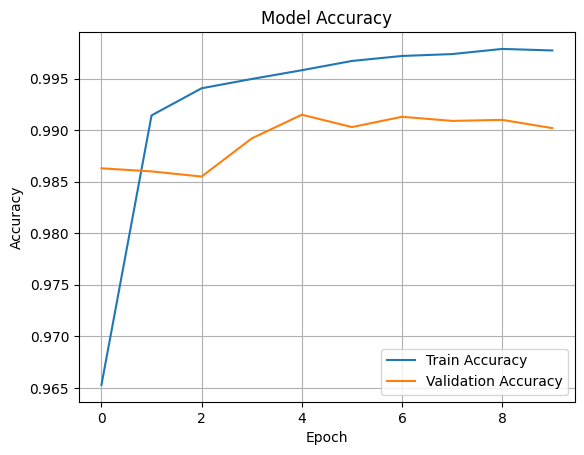

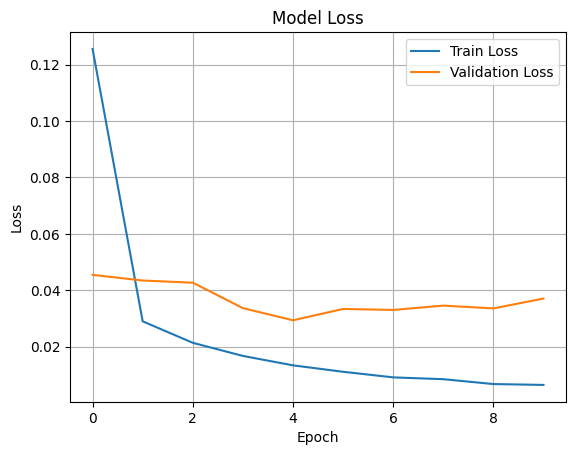

In [11]:
# Plot training and validation Accuracy and Loss

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
